In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline
plt.style.use('seaborn')

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
bag = rosbag.Bag('test.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/LogArduino': 'ea393fd09273b840e55feba3bf682d96'}, topics={'/logging_brake': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=6019, connections=1, frequency=196.0229938776464)})

In [5]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []

for topic, msg, t in bag.read_messages(topics=['/logging_brake']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

In [7]:
dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

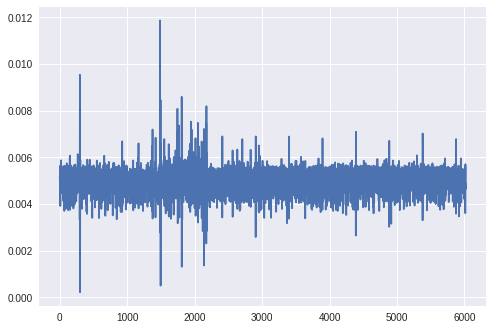

In [8]:
plt.plot(dt)

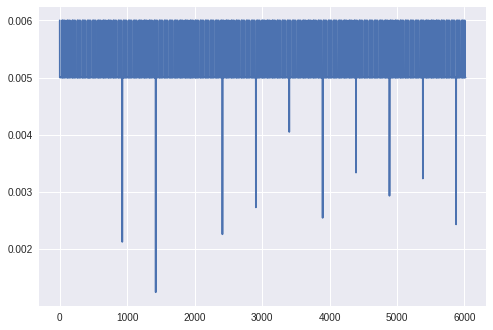

In [9]:
plt.plot(dt_header)